In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('WeatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [24]:
data.isnull().sum(axis=0)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [25]:
data = data.drop(columns=['Date','Location','Evaporation',
                          'Sunshine','Cloud9am','Cloud3pm'],axis=1)
data = data.dropna()
print(data.shape)

(112925, 17)


In [26]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

categorical_features = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(data, columns=categorical_features)
print(datafinal.shape)
datafinal.head()

(112925, 62)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
def preprocessing(data):

    standa = preprocessing.MinMaxScaler()
    standa.fit(datafinal)
    datafinal = pd.DataFrame(standa.transform(datafinal),
                             index=datafinal.index,columns=datafinal.columns)
    
datafinal.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']),columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Var correlation < 0.5%                  RainTomorrow
WindGustDir_S        0.001759
WindGustDir_SSW      0.003007
WindDir3pm_SSW       0.003230
WindDir3pm_WSW       0.002857
WindDir9am_SW        0.004053
Data Final (112925, 57)


In [29]:
from sklearn.model_selection import train_test_split
Y = datafinal1['RainTomorrow']
X = datafinal1.drop(columns=['RainTomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [30]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (90340, 56)
Y train shape:  (90340,)
X test shape:  (22585, 56)
Y test shape:  (22585,)


## LOGISTICS REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100)
logreg.fit(X_train, Y_train)
Y_predict1 = logreg.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import seaborn as sns

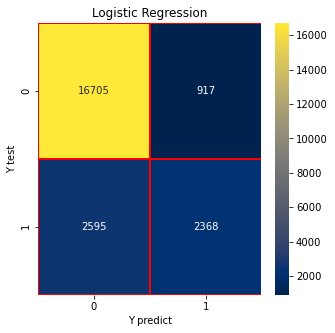

In [86]:
logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.5, linecolor='red', fmt='g', ax=ax, cmap="cividis")
plt.title('Logistic Regression')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [124]:
Score_logreg = logreg.score(X_test, Y_test)
print("Accuracy = {}".format(score_logreg))

Accuracy = 0.8444985609918088


In [100]:
score_lgpre = precision_score(Y_test, Y_predict1)
print("Precision = {}".format(score_lgpre))

Precision = 0.7208523592085236


In [102]:
score_lgrec = recall_score(Y_test, Y_predict1)
print("Recall = {}".format(score_lgrec))

Recall = 0.47713076768083823


In [104]:
score_lgf1 = f1_score(Y_test, Y_predict1)
print("F1 = {}".format(score_lgf1))

F1 = 0.574199806013579


## DECISION TREE CLASSIFIER

In [89]:
from sklearn.tree import DecisionTreeClassifier

dtcla = DecisionTreeClassifier(random_state=9)

dtcla.fit(X_train, Y_train)

Y_predict2 = dtcla.predict(X_test)

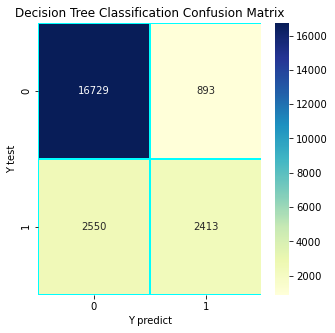

In [90]:
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
#import seaborn as sns

dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [125]:
score_dtcla = dtcla.score(X_test, Y_test)
print("Accuracy = {}".format(score_dtcla))

Accuracy = 0.7947310161611689


In [108]:
score_dtpre = precision_score(Y_test, Y_predict2)
print("Precision = {}".format(score_dtpre))

Precision = 0.5324340408649078


In [107]:
score_dtrec = recall_score(Y_test, Y_predict2)
print("Recall = {}".format(score_dtrec))

Recall = 0.540801934313923


In [105]:
score_dtf1 = f1_score(Y_test, Y_predict2)
print("F1 = {}".format(score_dtf1))

F1 = 0.5365853658536585


## RANDOM FOREST CLASSIFIER

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

rfc.fit(X_train, Y_train)

Y_predict3 = rfc.predict(X_test)

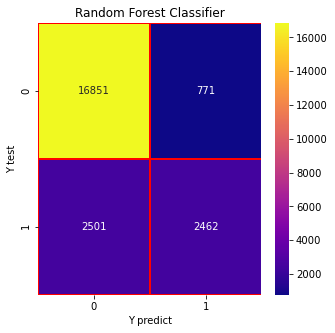

In [41]:
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
#import seaborn as sns

rfc_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfc_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="plasma")
plt.title('Random Forest Classifier')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [126]:
score_rfc = rfc.score(X_test, Y_test)
print("Accuracy = {}".format(score_rfc))

Accuracy = 0.8551250830197034


In [113]:
score_rfpre = precision_score(Y_test, Y_predict3)
print("Precision = {}".format(score_rfpre))

Precision = 0.7615218063717909


In [112]:
score_rfrec = recall_score(Y_test, Y_predict3)
print("Recall = {}".format(score_rfrec))

Recall = 0.49607092484384446


In [110]:
score_rff1 = f1_score(Y_test, Y_predict3)
print("F1 = {}".format(score_rff1))

F1 = 0.600780868716447


## K-Nearest Neighbours (KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
knc.fit(X_train, Y_train)
Y_predict4 = knc.predict(X_test)

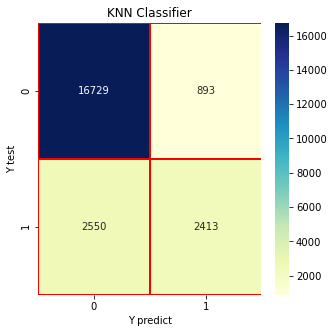

In [48]:
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
#import seaborn as sns

knc_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knc_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classifier')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [128]:
score_knc= knc.score(X_test, Y_test)
print("Accuracy = {}".format(score_knc))

Accuracy = 0.8475536860748284


In [118]:
score_knpre = precision_score(Y_test, Y_predict4)
print("Precision = {}".format(score_knpre))

Precision = 0.7298850574712644


In [117]:
score_knrec = recall_score(Y_test, Y_predict4)
print("Recall = {}".format(score_knrec))

Recall = 0.4861978641950433


In [115]:
score_knf1 = f1_score(Y_test, Y_predict4)
print("F1 = {}".format(score_knf1))

F1 = 0.5836255895513363


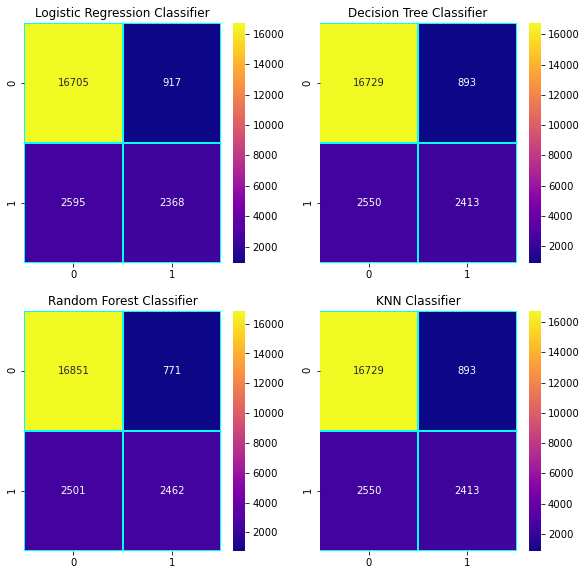

In [98]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classifier') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Decision Tree Classifier')
ax3 = fig.add_subplot(3, 3, 4)
ax3.set_title('Random Forest Classifier')
ax4 = fig.add_subplot(3, 3, 5)
ax4.set_title('KNN Classifier')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="plasma" ,fmt='g', ax=ax1)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="plasma" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfc_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="plasma" ,fmt='g', ax=ax3)
sns.heatmap(data=knc_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="plasma" ,fmt='g', ax=ax4)
plt.show()

In [97]:
Testscores = pd.Series([score_logreg, score_dtcla, score_rfc, score_knc],
                       index=['Logistic Regression Score','Decision Tree Score',
                              'Random Forest Score','K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score    0.844499
Decision Tree Score          0.794731
Random Forest Score          0.855125
K-Nearest Neighbour Score    0.847554
dtype: float64


In [120]:
Testscores2 = pd.Series([score_lgpre, score_dtpre, score_rfpre, score_knpre],
                       index=['Logistic Regression Precision','Decision Tree Precision',
                              'Random Forest Precision','K-Nearest Neighbour Precision']) 
print(Testscores2)

Logistic Regression Precision    0.720852
Decision Tree Precision          0.532434
Random Forest Precision          0.761522
K-Nearest Neighbour Precision    0.729885
dtype: float64


In [121]:
Testscores3 = pd.Series([score_lgrec, score_dtrec, score_rfrec, score_knrec],
                       index=['Logistic Regression Recall','Decision Tree Recall',
                              'Random Forest Recall','K-Nearest Neighbour Recall']) 
print(Testscores3)

Logistic Regression Recall    0.477131
Decision Tree Recall          0.540802
Random Forest Recall          0.496071
K-Nearest Neighbour Recall    0.486198
dtype: float64


In [123]:
Testscores4 = pd.Series([score_lgf1, score_dtf1, score_rff1, score_knf1],
                       index=['Logistic Regression F1','Decision Tree F1',
                              'Random Forest F1','K-Nearest Neighbour F1']) 
print(Testscores4)

Logistic Regression F1    0.574200
Decision Tree F1          0.536585
Random Forest F1          0.600781
K-Nearest Neighbour F1    0.583626
dtype: float64
